In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [124]:
df=pd.read_csv("C:/Users/Administrator/Downloads/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [125]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [127]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [128]:
df=df.drop(columns=['id','Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [129]:
X=df.drop(columns=['diagnosis'],axis=1)
y=df['diagnosis']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)   

In [131]:
num_cols=X.select_dtypes(include=['int64','float64']).columns
cat_cols=X.select_dtypes(include=['object']).columns

In [132]:
preprocessor= ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat',OrdinalEncoder(), cat_cols)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index([], dtype='object'))])

In [133]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index([], dtype='object'))])

In [134]:
pipeline=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(kernel='linear'))
    ]
)
pipeline
        

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se...', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', SVC(kernel='linear'))])

In [135]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se...', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', SVC(kernel='linear'))])

In [136]:
y_pred_1=pipeline.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_1))
print('\n')
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_1))
print('\n')
print("R2 Score:", r2_score(y_test, y_pred_1))

Mean Absolute Error: 0.023391812865497075


Mean Squared Error: 0.023391812865497075


R2 Score: 0.9012987012987013


In [137]:
pipeline2=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(kernel='rbf', gamma='scale', C=1.0, probability=True))
    ]
)
pipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se..., 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', SVC(probability=True))])

In [138]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se..., 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', SVC(probability=True))])

In [139]:
y_pred_2=pipeline2.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_2))
print('\n')
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_2))
print('\n')
print("R2 Score:", r2_score(y_test, y_pred_2))

Mean Absolute Error: 0.017543859649122806


Mean Squared Error: 0.017543859649122806


R2 Score: 0.925974025974026


In [140]:
# Visualize Decision Boundary
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train_transformed=pipeline2.named_steps['preprocessor'].transform(X_train)
X_train_pca = pca.fit_transform(X_train_transformed)

X_train_transformed


array([[-0.28192196,  0.66174195, -0.37431608, ..., -1.57163052,
        -0.987646  , -1.43016122],
       [ 0.18650131, -1.22186345,  0.28233605, ..., -0.05396602,
        -0.13691022,  0.38685223],
       [ 0.19207778,  0.51772843,  0.17417681, ...,  1.03113696,
         1.25592976,  1.32208767],
       ...,
       [ 0.57127757,  0.07425823,  0.52052941, ...,  0.56182245,
        -0.41995577, -1.13641521],
       [ 1.32410067,  0.48115357,  1.28210004, ...,  1.35098825,
         1.22554634,  0.7443152 ],
       [-0.08674559, -0.14747687, -0.10209509, ...,  0.20908924,
        -0.10172941,  0.29127678]])

In [141]:
len(X_train_pca)

398

In [142]:
svm_2d=SVC(kernel='rbf')
svm_2d.fit(X_train_pca, y_train)

SVC()

In [143]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

x_min, x_max, y_min, y_max

(-6.45112665112729, 17.674705136016595, -8.784363826478739, 13.369093689928004)

In [144]:
xx,yy=np.meshgrid(np.arange(x_min, x_max, 0.01),
                  np.arange(y_min, y_max, 0.01)
                  )

xx

array([[-6.45112665, -6.44112665, -6.43112665, ..., 17.64887335,
        17.65887335, 17.66887335],
       [-6.45112665, -6.44112665, -6.43112665, ..., 17.64887335,
        17.65887335, 17.66887335],
       [-6.45112665, -6.44112665, -6.43112665, ..., 17.64887335,
        17.65887335, 17.66887335],
       ...,
       [-6.45112665, -6.44112665, -6.43112665, ..., 17.64887335,
        17.65887335, 17.66887335],
       [-6.45112665, -6.44112665, -6.43112665, ..., 17.64887335,
        17.65887335, 17.66887335],
       [-6.45112665, -6.44112665, -6.43112665, ..., 17.64887335,
        17.65887335, 17.66887335]])

In [145]:
yy

array([[-8.78436383, -8.78436383, -8.78436383, ..., -8.78436383,
        -8.78436383, -8.78436383],
       [-8.77436383, -8.77436383, -8.77436383, ..., -8.77436383,
        -8.77436383, -8.77436383],
       [-8.76436383, -8.76436383, -8.76436383, ..., -8.76436383,
        -8.76436383, -8.76436383],
       ...,
       [13.34563617, 13.34563617, 13.34563617, ..., 13.34563617,
        13.34563617, 13.34563617],
       [13.35563617, 13.35563617, 13.35563617, ..., 13.35563617,
        13.35563617, 13.35563617],
       [13.36563617, 13.36563617, 13.36563617, ..., 13.36563617,
        13.36563617, 13.36563617]])

In [146]:
xx.ravel()

array([-6.45112665, -6.44112665, -6.43112665, ..., 17.64887335,
       17.65887335, 17.66887335])

In [147]:
xx.shape

(2216, 2413)

In [148]:
Z=svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z.shape   

(5347208,)

In [149]:
Z= Z.reshape(xx.shape)
Z.shape

(2216, 2413)

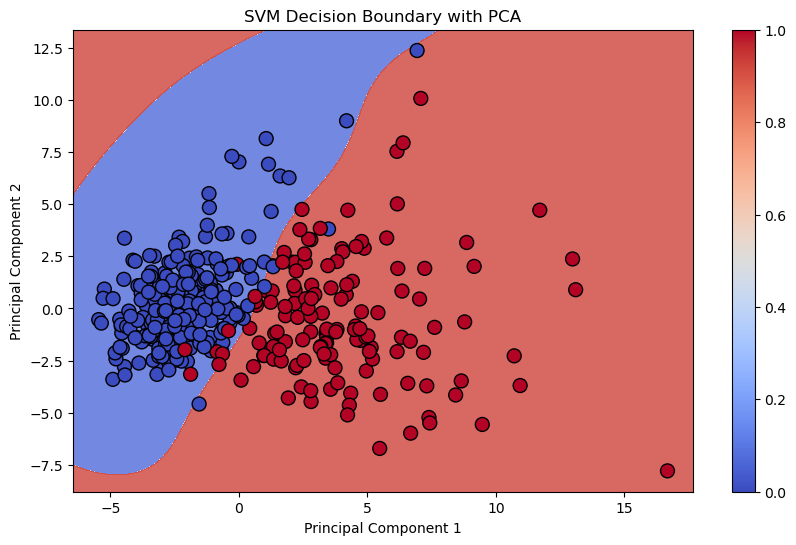

In [150]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8,cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.colorbar()
plt.show()

In [151]:
X_train_pca[:,0].max()

16.674705136016595

In [152]:
from sklearn.metrics import confusion_matrix,classification_report
cm= confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[104   1]
 [  2  64]]


In [153]:
classification_rep = classification_report(y_test, y_pred_2)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       105
           1       0.98      0.97      0.98        66

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean cross-validation score: 0.9736376339077782
Predictions from loaded model: [0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0]
Are predictions from the original and loaded model the same? True


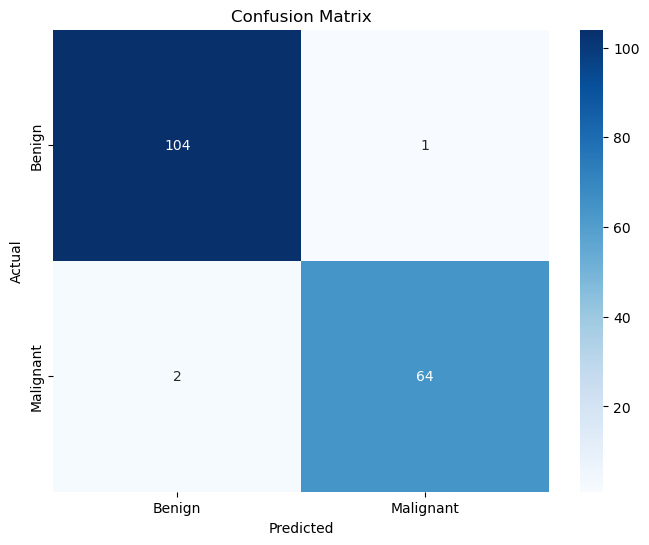

In [154]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(pipeline2, X, y, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))
# Save the model
import joblib
joblib.dump(pipeline2, 'svm_model.pkl')
# Load the model
loaded_model = joblib.load('svm_model.pkl')
# Predict using the loaded model
loaded_predictions = loaded_model.predict(X_test)
print("Predictions from loaded model:", loaded_predictions)
# Compare predictions from the original and loaded model
print("Are predictions from the original and loaded model the same?", np.array_equal(y_pred_2, loaded_predictions))
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()